# Ice Out Dates

Records of 'ice-out' and 'ice-in' days on selected Minnesota lakes are available from the Minnesota DNR at their web site [Ice Out Dates](http://www.dnr.state.mn.us/ice_out/index.html). The customs for determining ice-out and ice-in vary from lake to lake, so it's difficult to compare across different lakes. The DNR does attempt to use the same observers and criteria for each lake so longitudinal data series can provide useful insights.

## Initialization

### Load Python Modules

In [1]:
# Display graphics inline with the notebook
%matplotlib inline

# Standard Python modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime

# Modules to display images and data tables
from IPython.display import Image
from IPython.core.display import display

In [2]:
# Directory where data files are stored
dir = "../data/"
img = "../images/"

## Rainy Lake

In [3]:
# Read .csv file
RL_ICEOUT = pd.read_csv(dir + 'IceOut_RL.txt',index_col=0,parse_dates=True,skiprows=1);

# Remove duplicated data
RL_ICEOUT = RL_ICEOUT[RL_ICEOUT[' source']=='MNDNR-SCO']

# Drop unneeded columns
RL_ICEOUT.drop(' source',1,inplace=True)
RL_ICEOUT.drop(' comments',1,inplace=True)

# Determine Trend Line
RL_ICEOUT['DOY'] = RL_ICEOUT.index.dayofyear
RL_ICEOUT['n'] = pd.Series(np.arange(0.0, len(RL_ICEOUT)), index=RL_ICEOUT.index)

RL_model = pd.ols(x = RL_ICEOUT['n'], y = pd.Series(RL_ICEOUT['DOY']), intercept=True)
display(RL_model)

/Users/jeff/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: The pandas.stats.ols module is deprecated and will be removed in a future version. We refer to external packages like statsmodels, see some examples here: http://statsmodels.sourceforge.net/stable/regression.html
  exec(code_obj, self.user_global_ns, self.user_ns)



-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         86
Number of Degrees of Freedom:   2

R-squared:         0.0553
Adj R-squared:     0.0440

Rmse:              8.4941

F-stat (1, 84):     4.9135, p-value:     0.0294

Degrees of Freedom: model 1, resid 84

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.0818     0.0369      -2.22     0.0294    -0.1541    -0.0095
     intercept   126.9062     1.8160      69.88     0.0000   123.3468   130.4656
---------------------------------End of Summary---------------------------------

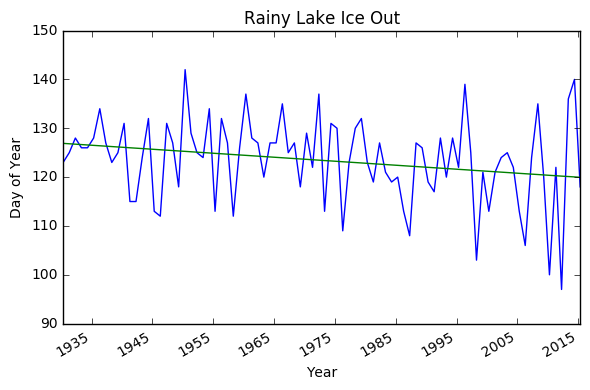

In [4]:
# Plot results
RL_ICEOUT['Trend'] = RL_model.beta['x']*RL_ICEOUT['n'] + RL_model.beta['intercept']

RL_ICEOUT['DOY'].plot()
plt.hold(True)
RL_ICEOUT['Trend'].plot()
plt.hold(False)
plt.title('Rainy Lake Ice Out')
plt.ylabel('Day of Year')
plt.xlabel('Year')

rl = plt.gca()

plt.tight_layout()

fname = '../images/IceOut_RL.png'

plt.savefig(fname)
!convert $fname -trim $fname

The relatively long data series for Rainy Lake provides a statistically signficant trend line. The ice-out day is consistently getting earlier and, at the some time, becoming more variable. Thus in the last few years, Rainy Lake has set earliest ice-out records and nearly broken lastest ice-out records.

## Kabetogoma Lake

In [5]:
# Read .csv file
KL_ICEOUT = pd.read_csv(dir + 'IceOut_KL.txt',index_col=0,parse_dates=True,skiprows=1)

# Remove duplicated data
KL_ICEOUT = KL_ICEOUT[KL_ICEOUT[' source']=='MNDNR-SCO']

# Drop unneeded columns
KL_ICEOUT.drop(' source',1,inplace=True)
KL_ICEOUT.drop(' comments',1,inplace=True)

# Determine Trend Line
KL_ICEOUT['DOY'] = KL_ICEOUT.index.dayofyear
KL_ICEOUT['n'] = pd.Series(np.arange(0, len(KL_ICEOUT)), index=KL_ICEOUT.index)
KL_model = pd.ols(x = KL_ICEOUT['n'], y = pd.Series(KL_ICEOUT['DOY']), intercept=True)
display(KL_model)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         28
Number of Degrees of Freedom:   2

R-squared:         0.0236
Adj R-squared:    -0.0140

Rmse:             10.9740

F-stat (1, 26):     0.6273, p-value:     0.4355

Degrees of Freedom: model 1, resid 26

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x    -0.2033     0.2567      -0.79     0.4355    -0.7066     0.2999
     intercept   120.1379     4.0391      29.74     0.0000   112.2213   128.0545
---------------------------------End of Summary---------------------------------

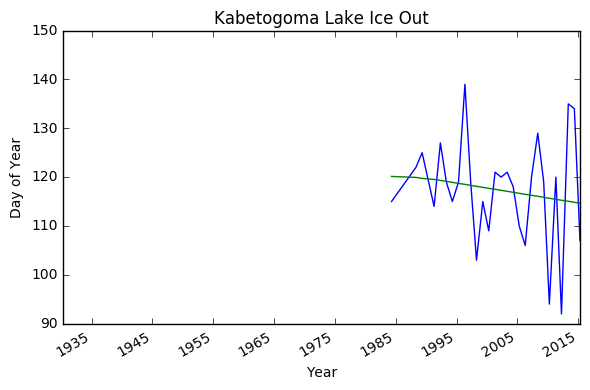

In [6]:
# Plot results
KL_ICEOUT['Trend'] = KL_model.beta['x']*KL_ICEOUT['n'] + KL_model.beta['intercept']
KL_ICEOUT['DOY'].plot()
plt.hold(True)
KL_ICEOUT['Trend'].plot()
plt.hold(False)
plt.title('Kabetogoma Lake Ice Out')
plt.ylabel('Day of Year')
plt.xlabel('Year')
plt.axis(rl.axis())

plt.tight_layout()

fname = img + 'IceOut_KL.png'

plt.savefig(fname)
!convert $fname -trim $fname

In [7]:
rl.axis()

(704675.0, 735716.0, 90.0, 150.0)

## Lake of the Woods

In [8]:
# Read .csv file
LOW_ICEOUT = pd.read_csv(dir + 'IceOut_LOW.txt',index_col=0,parse_dates=True,skiprows=1);

# Remove duplicated data
LOW_ICEOUT = LOW_ICEOUT[LOW_ICEOUT[' source']=='MNDNR-SCO']

# Drop unneeded columns
LOW_ICEOUT.drop(' source',1,inplace=True)
LOW_ICEOUT.drop(' comments',1,inplace=True)

# Determine Trend Line
LOW_ICEOUT['DOY'] = LOW_ICEOUT.index.dayofyear
LOW_ICEOUT['n'] = pd.Series(np.arange(0, len(LOW_ICEOUT)), index=LOW_ICEOUT.index)
LOW_model = pd.ols(x = LOW_ICEOUT['n'], y = pd.Series(LOW_ICEOUT['DOY']), intercept=True)
display(LOW_model)


-------------------------Summary of Regression Analysis-------------------------

Formula: Y ~ <x> + <intercept>

Number of Observations:         30
Number of Degrees of Freedom:   2

R-squared:         0.0145
Adj R-squared:    -0.0207

Rmse:             10.2995

F-stat (1, 28):     0.4112, p-value:     0.5266

Degrees of Freedom: model 1, resid 28

-----------------------Summary of Estimated Coefficients------------------------
      Variable       Coef    Std Err     t-stat    p-value    CI 2.5%   CI 97.5%
--------------------------------------------------------------------------------
             x     0.1485     0.2315       0.64     0.5266    -0.3053     0.6023
     intercept   118.6397     3.7675      31.49     0.0000   111.2554   126.0241
---------------------------------End of Summary---------------------------------

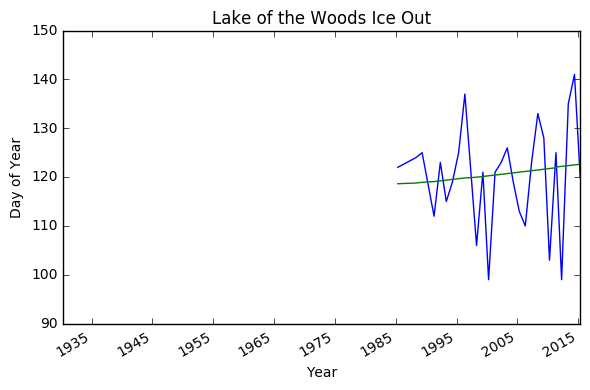

In [9]:
# Plot results
LOW_ICEOUT['Trend'] = LOW_model.beta['x']*LOW_ICEOUT['n'] + LOW_model.beta['intercept']
LOW_ICEOUT['DOY'].plot()
plt.hold(True)
LOW_ICEOUT['Trend'].plot()
plt.hold(False)
           
plt.title('Lake of the Woods Ice Out')
plt.ylabel('Day of Year')
plt.xlabel('Year')
plt.axis(rl.axis())

plt.tight_layout()

fname = img + 'IceOut_LOW.png'

plt.savefig(fname)
!convert $fname -trim $fname